# Provera reprezentativnosti uzorka

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import category_encoders as ce
from sklearn.decomposition import PCA

KDD99 baza podataka je zasnovana na inicijativi 1998 DARPA da obezbedi dizajnerima sistema za otkrivanje upada benchmark pomoću koga će oceniti različite metodologije. Da bi se to postiglo napravljena je simulacija veštačke
vojne mreže koja se sastoji od tri ”ciljane” mašine na kojima se izvršavaju različiti operativni sistemi i servisi. Dodatne tri mašine su korišćene da ”zamaskiraju” različite IP adrese i na taj način generišući saobraćaj izmedu različitih IP adresa. Na kraju, korišćeno je ”njuškalo” koje beleži sav mrežni saobraćaj. Ukupan simulirani period je sedam nedelja.
Tokom tih 7 nedelja prikupljeno je skoro 5 miliona konekcija. A KDD99 baza podataka pruza skup podataka koji predstavljaju 10% tog ukupnog skupa, koji mi koristimo u ovom radu. Pretpostavlja se da mala baza predstavlja reprezentativan uzorak velike, medjutim, mi smo to zelele da proverimo ovde.

In [3]:
data = pd.read_csv('kddcup.csv.data_10_percent_corrected')

In [4]:
allClasses = list(data['class'])

In [5]:
classes = np.unique(np.array(allClasses))

In [6]:
len(allClasses)

494021

In [7]:
numberOfInstances = len(allClasses)
numClassesSmall = []
percentagesSmall = []

In [8]:
print('MALA BAZA:\n')

for attack in classes:
    num = allClasses.count(attack)
    numClassesSmall.append(num)
    percentage = (num * 100)/numberOfInstances
    percentagesSmall.append(percentage)
    print("Instanci klase %s ima %d. Procentualno: %g" %(attack, num, percentage))

MALA BAZA:

Instanci klase back. ima 2203. Procentualno: 0.445932
Instanci klase buffer_overflow. ima 30. Procentualno: 0.00607262
Instanci klase ftp_write. ima 8. Procentualno: 0.00161936
Instanci klase guess_passwd. ima 53. Procentualno: 0.0107283
Instanci klase imap. ima 12. Procentualno: 0.00242905
Instanci klase ipsweep. ima 1247. Procentualno: 0.252418
Instanci klase land. ima 21. Procentualno: 0.00425083
Instanci klase loadmodule. ima 9. Procentualno: 0.00182178
Instanci klase multihop. ima 7. Procentualno: 0.00141694
Instanci klase neptune. ima 107201. Procentualno: 21.6997
Instanci klase nmap. ima 231. Procentualno: 0.0467591
Instanci klase normal. ima 97278. Procentualno: 19.6911
Instanci klase perl. ima 3. Procentualno: 0.000607262
Instanci klase phf. ima 4. Procentualno: 0.000809682
Instanci klase pod. ima 264. Procentualno: 0.053439
Instanci klase portsweep. ima 1040. Procentualno: 0.210517
Instanci klase rootkit. ima 10. Procentualno: 0.00202421
Instanci klase satan. ima 

In [9]:
print(sum(percentagesSmall))

99.99999999999999


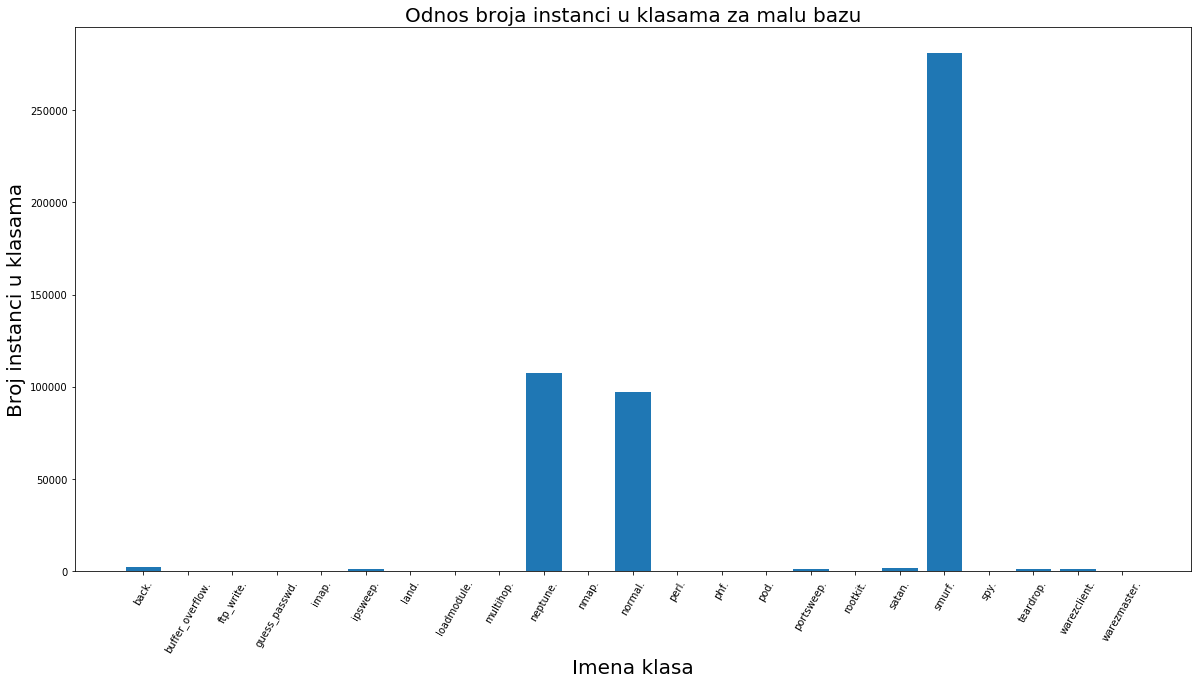

In [10]:
plt.figure(figsize = (20, 10))
plt.title('Odnos broja instanci u klasama za malu bazu', fontsize = 20)
plt.bar(np.arange(23), height = numClassesSmall, tick_label = classes)
plt.xticks(rotation = '60')
plt.xlabel('Imena klasa', fontsize = 20)
plt.ylabel('Broj instanci u klasama', fontsize = 20)
plt.show()

In [11]:
dataBig = pd.read_csv('kddcup.data.csv.corrected')

In [12]:
allClassesBig = list(dataBig['class'])

In [13]:
classesBig = np.unique(np.array(allClassesBig))

In [14]:
classesBig

array(['back.', 'buffer_overflow.', 'ftp_write.', 'guess_passwd.',
       'imap.', 'ipsweep.', 'land.', 'loadmodule.', 'multihop.',
       'neptune.', 'nmap.', 'normal.', 'perl.', 'phf.', 'pod.',
       'portsweep.', 'rootkit.', 'satan.', 'smurf.', 'spy.', 'teardrop.',
       'warezclient.', 'warezmaster.'], dtype='<U16')

In [15]:
numberOfInstancesBig = len(allClassesBig)
numClassesBig = []
percentagesBig = []

In [16]:
print('\n\nVELIKA BAZA:\n')

for attack in classesBig:
    num = allClassesBig.count(attack)
    numClassesBig.append(num)
    percentage = (num * 100)/numberOfInstancesBig
    percentagesBig.append(percentage)
    print("Instanci klase %s ima %d. Procentualno: %g" %(attack, num, percentage))



VELIKA BAZA:

Instanci klase back. ima 2203. Procentualno: 0.0449736
Instanci klase buffer_overflow. ima 30. Procentualno: 0.000612441
Instanci klase ftp_write. ima 8. Procentualno: 0.000163318
Instanci klase guess_passwd. ima 53. Procentualno: 0.00108198
Instanci klase imap. ima 12. Procentualno: 0.000244976
Instanci klase ipsweep. ima 12481. Procentualno: 0.254796
Instanci klase land. ima 21. Procentualno: 0.000428709
Instanci klase loadmodule. ima 9. Procentualno: 0.000183732
Instanci klase multihop. ima 7. Procentualno: 0.000142903
Instanci klase neptune. ima 1072017. Procentualno: 21.8849
Instanci klase nmap. ima 2316. Procentualno: 0.0472804
Instanci klase normal. ima 972781. Procentualno: 19.859
Instanci klase perl. ima 3. Procentualno: 6.12441e-05
Instanci klase phf. ima 4. Procentualno: 8.16588e-05
Instanci klase pod. ima 264. Procentualno: 0.00538948
Instanci klase portsweep. ima 10413. Procentualno: 0.212578
Instanci klase rootkit. ima 10. Procentualno: 0.000204147
Instanc

In [17]:
print(sum(percentagesBig))

99.99999999999999


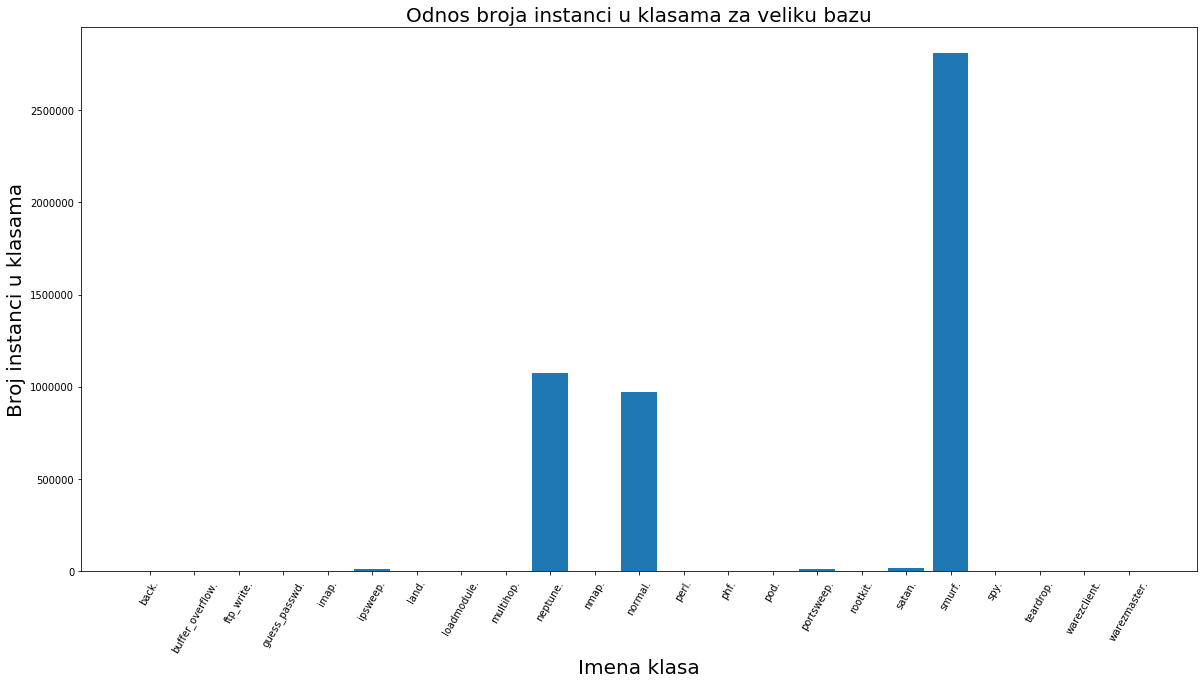

In [18]:
plt.figure(figsize = (20, 10))
plt.title('Odnos broja instanci u klasama za veliku bazu', fontsize = 20)
plt.bar(np.arange(23), height = numClassesBig, tick_label = classesBig)
plt.xticks(rotation = '60')
plt.xlabel('Imena klasa', fontsize = 20)
plt.ylabel('Broj instanci u klasama', fontsize = 20)
plt.show()

In [19]:
print('\nRazlike u procentima:\n')
differences = [np.abs(percentagesBig[i] - percentagesSmall[i]) for i in range(len(percentagesBig))]
for dif in differences:
    print(dif)


Razlike u procentima:

0.4009588759622373
0.005460175342200235
0.0014560467579200628
0.009646309771220416
0.0021840701368800943
0.002377452932707469
0.003822122739540165
0.0016380526026600704
0.001274040913180055
0.18522076406980048
0.0005212996478151585
0.167966648212726
0.0005460175342200236
0.0007280233789600314
0.04804954301136207
0.0020609058415098636
0.0018200584474000784
0.0027841687478267763
0.48448590936494895
0.0003640116894800157
0.17818372200046767
0.185645961634808
0.003640116894800157


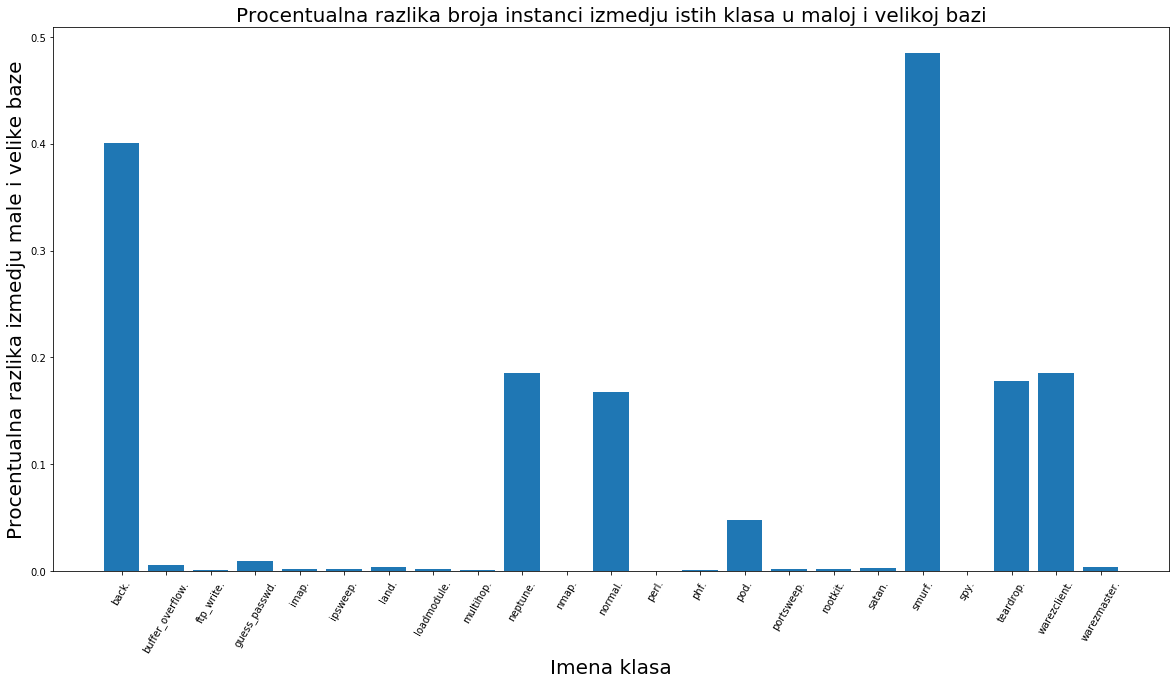

In [20]:
plt.figure(figsize = (20, 10))
plt.title('Procentualna razlika broja instanci izmedju istih klasa u maloj i velikoj bazi', fontsize = 20)
plt.bar(np.arange(23), height = differences, tick_label = classesBig)
plt.xticks(rotation = '60')
plt.xlabel('Imena klasa', fontsize = 20)
plt.ylabel('Procentualna razlika izmedju male i velike baze', fontsize = 20)
plt.show()